In [1]:
!pip install keras

  Using cached Keras-2.4.3-py2.py3-none-any.whl (36 kB)
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [2]:
!pip install mysql-connector-python-rf
!pip install JPype1==0.6.3 --force-reinstall
!pip install --upgrade snowflake-sqlalchemy
#!pip install jaydebeapi
#!pip install emoji

     |████████████████████████████████| 11.9 MB 6.4 MB/s eta 0:00:01
  Created wheel for mysql-connector-python-rf: filename=mysql_connector_python_rf-2.2.2-cp36-cp36m-linux_x86_64.whl size=249455 sha256=a1512e7a7b692317b9d58991b51282c88ebd86e0c25b66e651b407e1c9e7fd22
  Stored in directory: /home/ec2-user/.cache/pip/wheels/51/40/3f/136443b7177ee453aa9d6c8862fc2d1a1ea8ff8ee0999d1971
Successfully built mysql-connector-python-rf
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.
     |████████████████████████████████| 168 kB 7.5 MB/s eta 0:00:01
  Created wheel for JPype1: filename=JPype1-0.6.3-cp36-cp36m-linux_x86_64.whl size=2508729 sha256=73d79a50d31924e76dcf4011f9a534e4c5f21964d8534c1183ae4edc64083662
  Stored in directory: /home/ec2-user/.cache/pip/wheels/26/1a/2a/2efafac3f262c651b1720038416cb6d196d283a32de884576e
Successfully built JPype1
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/p

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.
     |████████████████████████████████| 43 kB 2.2 MB/s  eta 0:00:01
  Created wheel for emoji: filename=emoji-0.5.4-py3-none-any.whl size=42175 sha256=876dcec2dfd2f889d522cd5cac86a5d32946e5d9855cd047469cab3d8c987702
  Stored in directory: /home/ec2-user/.cache/pip/wheels/22/95/98/a21ffcc81fac65949a085ceff9dca4a145a32d9bbfcbf1cb31
Successfully built emoji
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [7]:
!pip install tensorflow

     |█████████████████████████████   | 466.2 MB 86.1 MB/s eta 0:00:01

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



     |████████████████████████████████| 516.2 MB 16 kB/s 
     |████████████████████████████████| 104 kB 74.1 MB/s eta 0:00:01
     |████████████████████████████████| 42 kB 2.2 MB/s  eta 0:00:01
     |████████████████████████████████| 63 kB 3.3 MB/s  eta 0:00:01
     |████████████████████████████████| 3.0 MB 74.4 MB/s eta 0:00:01
     |████████████████████████████████| 3.0 MB 71.8 MB/s eta 0:00:01
     |████████████████████████████████| 57 kB 7.7 MB/s  eta 0:00:01
     |████████████████████████████████| 454 kB 65.3 MB/s eta 0:00:01
     |████████████████████████████████| 88 kB 12.8 MB/s eta 0:00:01
     |████████████████████████████████| 91 kB 16.7 MB/s eta 0:00:01
     |████████████████████████████████| 779 kB 54.4 MB/s eta 0:00:01
     |████████████████████████████████| 155 kB 75.4 MB/s eta 0:00:01
  Created wheel for absl-py: filename=absl_py-0.9.0-py3-none-any.whl size=121931 sha256=c1fa42483a11b87b69a391b1b0691216e83deff89f0092bf639ce710919a3939
  Stored in directory: /home/ec2-us

In [5]:
# IMPORT PACKAGES 
import os
#os.system('python -m spacy download en')

#to Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np  
from pandas import Series, DataFrame
import re

#to tokenize the text
from nltk.tokenize import sent_tokenize, word_tokenize#to tokenize the text
import nltk
from keras.preprocessing.text import Tokenizer
from textblob import Word, Blobber
import configparser


import mysql.connector
import psycopg2
from collections import OrderedDict
#for train and test splitting
from sklearn.model_selection import train_test_split,KFold
from sklearn.feature_extraction.text import TfidfVectorizer# to convert the text into sequence of vectors
# For evalution
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report

import boto3
import textwrap
#for encoading
import ftfy
from ftfy import fix_encoding
from ftfy import fix_text




#For lemmitization
import en_core_web_sm
import spacy
from spacy import displacy
from collections import Counter
from nltk.corpus import stopwords# for stopwords removal
#for Bert modelling
from sqlalchemy import create_engine
from snowflake.sqlalchemy import URL

#for loading pretrained word embedding
import gensim 
from gensim import corpora
import pyLDAvis 
import pyLDAvis.gensim 
 

from tqdm import tqdm
tqdm.pandas()
#for mathematical operation
import math


In [8]:
#For constructing Depp leaning network
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential, load_model
from keras.layers import Dense, Embedding, LSTM, Bidirectional,RepeatVector,SpatialDropout1D



In [9]:
#importing training dataset
df = pd.read_csv("train.csv")

In [10]:
df.shape

(7613, 5)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [12]:
df.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [15]:
#checking for duplicates
df[df.duplicated()]

,id,keyword,location,text,target


In [16]:
df.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [268]:
#converting to lower text
df['tweet'] = df.apply(lambda row: str(row['text']).lower(), axis=1)

In [269]:
df.head()

,id,keyword,location,text,target,tweet
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,our deeds are the reason of this #earthquake m...
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask. canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,all residents asked to 'shelter in place' are ...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,"13,000 people receive #wildfires evacuation or..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,just got sent this photo from ruby #alaska as ...


In [270]:
# # Fix Encoding Issues
df['tweet'] = df['tweet'].astype(str).apply(fix_encoding)

In [271]:
# Expand contractions

contractions_dict = {
    "didn't": "did not",
    "don't": "do not",
    "aren't": "are not",
    "can't": "cannot",
    #"cant": "cannot",
    "can't've": "cannot have",
    #"'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    #"didnt": "did not",
    "doesn't": "does not",
    #"doesnt ": "does not ",
    "don't": "do not",
    #"dont " : "do not ",
    "hadn't": "had not",
    "here's":"here is",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he had",
    "he'd've": "he would have",
    "he'll": "he will",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i had",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'll": "it will",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she had",
    "she'd've": "she would have",
    "she'll": "she will",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "that's": "that is",
    "there's": "there is",
    "they'd": "they had",
    "they'd've": "they would have",
    "they'll": "they will",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we had",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who's": "who is",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "you'll": "you will",
    "you're": "you are",
    "you've": "you have"
    }

In [272]:
contractions_re = re.compile('(%s)' % '|'.join(contractions_dict.keys()))

def expand_contractions(s, contractions_dict=contractions_dict):
    def replace(match):
        return contractions_dict[match.group(0)]
    return contractions_re.sub(replace, s)

df['tweet'] = df['tweet'].apply(expand_contractions)

In [273]:
df['tweet']

0       our deeds are the reason of this #earthquake m...
1                  forest fire near la ronge sask. canada
2       all residents asked to 'shelter in place' are ...
3       13,000 people receive #wildfires evacuation or...
4       just got sent this photo from ruby #alaska as ...
                              ...                        
7608    two giant cranes holding a bridge collapse int...
7609    @aria_ahrary @thetawniest the out of control w...
7610    m1.94 [01:04 utc]?5km s of volcano hawaii. htt...
7611    police investigating after an e-bike collided ...
7612    the latest: more homes razed by northern calif...
Name: tweet, Length: 7613, dtype: object

In [280]:
#to correct the Slang ASAP->As Soon As Possible
def translator(user_string):
    user_string = user_string.split(" ")
    j = 0
    for _str in user_string:
        # File path which consists of Abbreviations.
        fileName = "Slang"
        # File Access mode [Read Mode]
        accessMode = "r"
        with open(fileName, accessMode) as myCSVfile:
            # Reading file as CSV with delimiter as "=", so that abbreviation are stored in row[0] and phrases in row[1]
            dataFromFile = csv.reader(myCSVfile, delimiter="=")
            # Removing Special Characters.
            _str = re.sub('[^a-zA-Z0-9-_.]', '', _str)
            for row in dataFromFile:
                # Check if selected word matches short forms[LHS] in text file.
                if _str.upper() == row[0]:
                    # If match found replace it with its Abbreviation in text file.
                    user_string[j] = row[1]
            myCSVfile.close()
        j = j + 1
    # Replacing commas with spaces for final output.
    temp = ' '.join(user_string)
    return temp

In [281]:
# Calling translator
df['trans'] = df['tweet'].apply(translator)

In [282]:
df['trans']

0       our deeds are the reason of this #earthquake m...
1                  forest fire near la ronge sask. canada
2       all residents asked to 'shelter in place' are ...
3       13,000 people receive #wildfires evacuation or...
4       just got sent this photo from ruby #alaska as ...
                              ...                        
7608    two giant cranes holding a bridge collapse int...
7609    @aria_ahrary @thetawniest the out of control w...
7610    m1.94 [01:04 utc]?5km s of volcano hawaii. htt...
7611    police investigating after an e-bike collided ...
7612    the latest: more homes razed by northern calif...
Name: trans, Length: 7613, dtype: object

In [242]:
# Removing punctuation, html tags, symbols, numbers, etc.

def remove_noise(text):
    # Dealing with Punctuation
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [283]:
# Calling remove_noise function in order to remove noise
df['trans'] = df['trans'].apply(lambda x: remove_noise(x))

In [136]:
from string import punctuation
def remove_punctuations(string):
    return ''.join(c for c in string if c not in punctuation)

In [284]:
df['trans'] = df.apply(lambda row: remove_punctuations(row['trans']), axis=1)

In [285]:
#"remove whitespaces before and after string")
df['trans'] = df['trans'].str.strip()

#"remove double spaces within sentence")
df['trans'] = df['trans'].map(lambda x: " ".join(x.split()))

In [139]:
import string

In [113]:
stop_words = set(stopwords.words('english'))

def remove_stopwords(string):    
    tokenized = word_tokenize(string)
    filtered_sentence = [word for word in tokenized if not word in stop_words]
    return ' '.join(c for c in filtered_sentence)

In [286]:
df['trans'] = df.apply(lambda row: remove_stopwords(row['trans']), axis=1)

In [415]:
#lemetization
def spacy_lemmatize_text(text):
    text = nlp(text)
    text = ' '.join([word.lemma_ if word.lemma_ != '-PRON-' else word.text for word in text])
    return text

In [416]:
df['check']  = df['trans'] .apply(spacy_lemmatize_text)

In [48]:
#Stemming
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

def stemming(text):
    text = [stemmer.stem(word) for word in text.split()]
    return ' '.join(text)

df['tweet']  = df['tweet'] .apply(stemming)


In [328]:
df.head()

,id,keyword,location,text,target,tweet,trans
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,our deeds are the reason of this #earthquake m...,deeds reason earthquake may allah forgive us
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask. canada,forest fire near la ronge sask canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,all residents asked to 'shelter in place' are ...,resident ask shelter place notify officer evac...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,"13,000 people receive #wildfires evacuation or...",people receive wildfire evacuation order calif...
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,just got sent this photo from ruby #alaska as ...,get send photo ruby alaska smoke wildfire pour...


In [405]:
df['trans']

0            deeds reason earthquake may allah forgive us
1                   forest fire near la ronge sask canada
2       resident ask shelter place notify officer evac...
3       people receive wildfire evacuation order calif...
4       get send photo ruby alaska smoke wildfire pour...
                              ...                        
7608     two giant crane hold bridge collapse nearby home
7609    ariaahrary thetawniest control wild fire calif...
7610                                       volcano hawaii
7611    police investigate ebike collided car little p...
7612    late home raze northern california wildfire ab...
Name: trans, Length: 7613, dtype: object

# Model Building

In [329]:
X = df['trans']
y = df['target']

In [330]:
X

0            deeds reason earthquake may allah forgive us
1                   forest fire near la ronge sask canada
2       resident ask shelter place notify officer evac...
3       people receive wildfire evacuation order calif...
4       get send photo ruby alaska smoke wildfire pour...
                              ...                        
7608     two giant crane hold bridge collapse nearby home
7609    ariaahrary thetawniest control wild fire calif...
7610                                       volcano hawaii
7611    police investigate ebike collided car little p...
7612    late home raze northern california wildfire ab...
Name: trans, Length: 7613, dtype: object

In [331]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size=0.3,random_state=0,stratify = y)

In [332]:
X.shape

(7613,)

In [333]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [334]:
y_train.value_counts()

0    3024
1    2305
Name: target, dtype: int64

In [335]:
y_test.value_counts()

0    1318
1     966
Name: target, dtype: int64

In [336]:

#reviews = x_mix.values
#sentiments = y_mix.values

train_reviews = np.array(X_train)
train_sentiments = np.array(y_train)

test_reviews = np.array(X_test)
test_sentiments = np.array(y_test)

In [337]:
norm_train_reviews = train_reviews
norm_test_reviews = test_reviews
#norm_bench_reviews = bench_reviews

In [338]:
import tensorflow as tf

In [339]:
t = tf.keras.preprocessing.text.Tokenizer(oov_token='<UNK>')
# fit the tokenizer on the documents
t.fit_on_texts(norm_train_reviews)
t.word_index['<PAD>'] = 0

In [303]:
max([(k, v) for k, v in t.word_index.items()], key = lambda x:x[1]), min([(k, v) for k, v in t.word_index.items()], key = lambda x:x[1]), t.word_index['<UNK>']

(('symptoms', 13322), ('<PAD>', 0), 1)

In [340]:
#converting to sequence
train_sequences = t.texts_to_sequences(norm_train_reviews)
test_sequences = t.texts_to_sequences(norm_test_reviews)
#bench_sequences = t.texts_to_sequences(norm_bench_reviews)

In [341]:
print("Vocabulary size={}".format(len(t.word_index)))
print("Number of Documents={}".format(t.document_count))

Vocabulary size=11901
Number of Documents=5329


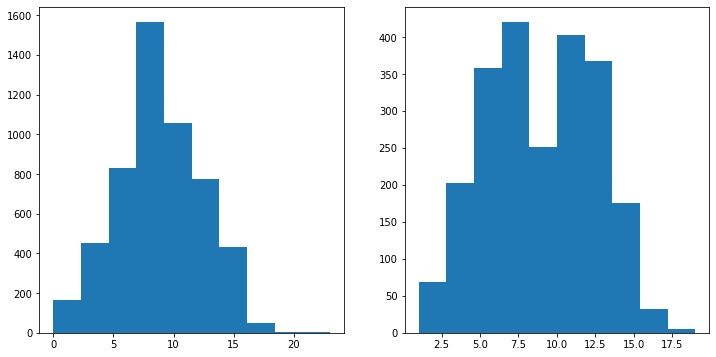

In [342]:
import matplotlib.pyplot as plt
%matplotlib inline

train_lens = [len(s) for s in train_sequences]
test_lens = [len(s) for s in test_sequences]


fig, ax = plt.subplots(1,2, figsize=(12, 6))
h1 = ax[0].hist(train_lens)
h2 = ax[1].hist(test_lens)


In [366]:
#Normalizing the docs
MAX_SEQUENCE_LENGTH = 1000

In [367]:
# pad dataset to a maximum review length in words
X_train = tf.keras.preprocessing.sequence.pad_sequences(train_sequences, maxlen=MAX_SEQUENCE_LENGTH)
X_test = tf.keras.preprocessing.sequence.pad_sequences(test_sequences, maxlen=MAX_SEQUENCE_LENGTH)
#ben_X_test = tf.keras.preprocessing.sequence.pad_sequences(bench_sequences, maxlen=MAX_SEQUENCE_LENGTH)

X_train.shape, X_test.shape#,ben_X_test.shape

((5329, 1000), (2284, 1000))

In [409]:
#Encoading labels
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
le = LabelEncoder()
num_classes=2 # positive -> 1, negative -> 0
On = OneHotEncoder()

In [369]:
test_sentiments = test_sentiments.reshape(-1,1)

In [370]:
train_sentiments = train_sentiments.reshape(-1,1)

In [412]:
y_train = le.fit_transform(train_sentiments)
y_test = le.transform(test_sentiments)
#ben_y_test = le.transform(bench_senti)

In [410]:
y_train = On.fit_transform(train_sentiments)
y_test = On.transform(test_sentiments)
#ben_y_test = le.transform(bench_senti)

In [372]:
test_sentiments

array([[1],
       [0],
       [1],
       ...,
       [1],
       [1],
       [1]])

In [413]:
y_test

array([1, 0, 1, ..., 1, 1, 1])

In [374]:
VOCAB_SIZE = len(t.word_index)
VOCAB_SIZE

11901

# Constructing LSTM

In [375]:
EMBEDDING_DIM = 300 # dimension for dense embeddings for each token
LSTM_DIM = 128 # total LSTM units

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Embedding(input_dim=VOCAB_SIZE, output_dim=EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH))
model.add(tf.keras.layers.SpatialDropout1D(0.1))
model.add(tf.keras.layers.LSTM(LSTM_DIM, return_sequences=True))
model.add(tf.keras.layers.LSTM(LSTM_DIM, return_sequences=False))
#model.add(tf.keras.layers.LSTM(LSTM_DIM, return_sequences=False))
#model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(LSTM_DIM, return_sequences=False)))
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(1,activation="sigmoid"))

model.compile(loss="binary_crossentropy", optimizer="Adam",
              metrics=["accuracy"])
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, 1000, 300)         3570300   
_________________________________________________________________
spatial_dropout1d_11 (Spatia (None, 1000, 300)         0         
_________________________________________________________________
lstm_20 (LSTM)               (None, 1000, 128)         219648    
_________________________________________________________________
lstm_21 (LSTM)               (None, 128)               131584    
_________________________________________________________________
dense_22 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 257       
Total params: 3,954,813
Trainable params: 3,954,813
Non-trainable params: 0
___________________________________________

In [376]:
batch_size = 100

model.fit(X_train, y_train, epochs=5, batch_size=batch_size, 
          shuffle=True, validation_split=0.2, verbose=1)

Epoch 1/5
43/43 [==============================] - 109s 3s/step - loss: 0.6231 - accuracy: 0.6453 - val_loss: 0.4839 - val_accuracy: 0.7692
Epoch 2/5
43/43 [==============================] - 108s 3s/step - loss: 0.3247 - accuracy: 0.8722 - val_loss: 0.5044 - val_accuracy: 0.7608
Epoch 3/5
43/43 [==============================] - 108s 3s/step - loss: 0.1625 - accuracy: 0.9432 - val_loss: 0.6519 - val_accuracy: 0.7552
Epoch 4/5
43/43 [==============================] - 108s 3s/step - loss: 0.1013 - accuracy: 0.9629 - val_loss: 0.7412 - val_accuracy: 0.7570
Epoch 5/5
43/43 [==============================] - 109s 3s/step - loss: 0.0696 - accuracy: 0.9765 - val_loss: 0.6638 - val_accuracy: 0.7495


In [377]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 74.56%


In [183]:
#without stop words and stemming done
#2 layer 74.65%
#Bi- dir 75.22%

#with stop word and without stemming
#2 layer 76.80%
#Bi- dir 74.43%
#Accuracy: 77.15% MAX_SEQUENCE_LENGTH = 1000

#with Slang conversion
#2 layer 74.12%

# Using Random Forest

In [356]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
# random forest model creation
depth = [2,4,6,8,10,15,20,30,40]
for d in depth:
    rfc = RandomForestClassifier(max_depth=d, random_state=20)
    rfc.fit(X_train, y_train)
    # predictions
    print ("Accuracy for Depth=%s: %s" % (d, accuracy_score(y_test, rfc.predict(X_test))))



Accuracy for Depth=2: 0.5770577933450087
Accuracy for Depth=4: 0.6138353765323993
Accuracy for Depth=6: 0.6256567425569177
Accuracy for Depth=8: 0.6361646234676007
Accuracy for Depth=10: 0.6357267950963222
Accuracy for Depth=15: 0.648861646234676
Accuracy for Depth=20: 0.6414185639229422
Accuracy for Depth=30: 0.6396672504378283
Accuracy for Depth=40: 0.6475481611208407


In [357]:
depth = [40,60,70,80,90,100]
for d in depth:
    rfc = RandomForestClassifier(max_features= 'sqrt',max_depth=d,n_estimators=1000, random_state=20)
    rfc.fit(X_train, y_train)
    # predictions
    print ("Accuracy for Depth=%s: %s" % (d, accuracy_score(y_test, rfc.predict(X_test))))


Accuracy for Depth=40: 0.6440455341506129
Accuracy for Depth=60: 0.6457968476357268
Accuracy for Depth=70: 0.6457968476357268
Accuracy for Depth=80: 0.6457968476357268
Accuracy for Depth=90: 0.6457968476357268
Accuracy for Depth=100: 0.6457968476357268


In [188]:
#Grid search'
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
# define dataset
x, y = make_blobs(n_samples=1000, centers=2, n_features=100, cluster_std=20)
# define models and parameters
model = RandomForestClassifier()
n_estimators = [10, 100, 1000]
max_features = ['sqrt', 'log2']
# define grid search
grid = dict(n_estimators=n_estimators,max_features=max_features)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.667544 using {'max_features': 'sqrt', 'n_estimators': 1000}
0.630512 (0.016347) with: {'max_features': 'sqrt', 'n_estimators': 10}
0.656910 (0.012803) with: {'max_features': 'sqrt', 'n_estimators': 100}
0.667544 (0.013331) with: {'max_features': 'sqrt', 'n_estimators': 1000}
0.629446 (0.019090) with: {'max_features': 'log2', 'n_estimators': 10}
0.655407 (0.015326) with: {'max_features': 'log2', 'n_estimators': 100}
0.667232 (0.015529) with: {'max_features': 'log2', 'n_estimators': 1000}


# Trying TF IDF

In [358]:
#Tf-IDF
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
tfidf = TfidfVectorizer(min_df=2, max_df=0.5, ngram_range=(1, 2))
tfidf.fit(train_X)
train_tfidf = tfidf.fit_transform(train_X)
test_tf_idf = tfidf.transform(test_X)

In [359]:
train_tfidf

<5329x7542 sparse matrix of type '<class 'numpy.float64'>'
	with 50290 stored elements in Compressed Sparse Row format>

In [360]:
# Using CountVectorizer to change the teweets to vectors
count_vectorizer = CountVectorizer(analyzer='word', binary=True)
count_vectorizer.fit(train_X)

train_vectors = count_vectorizer.fit_transform(train_X)



# Printing first vector
print(train_vectors[0].todense())

[[0 0 0 ... 0 0 0]]


In [361]:
test_vectors = count_vectorizer.transform(test_X)

In [362]:
# Creating a simple MultinomialNB model
from sklearn.naive_bayes import MultinomialNB
from sklearn import model_selection, feature_extraction, linear_model
model = MultinomialNB(alpha=1)

# Using cross validation to print out our scores
scores = model_selection.cross_val_score(model, train_tfidf, train_y, cv=3, scoring="f1")
scores

array([0.71779141, 0.7030303 , 0.69756839])

In [363]:
scores

array([0.71779141, 0.7030303 , 0.69756839])

In [364]:
# Training model with train_vectors and target variable
model.fit(train_tfidf, train_y)

MultinomialNB(alpha=1, class_prior=None, fit_prior=True)

In [365]:
accuracy_score(test_y, model.predict(test_tf_idf))

0.7968476357267951

In [232]:
import csv
import re

In [255]:
translator('CU ASAP')

See You As Soon As Possible


In [321]:
!python -m spacy download en

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/en_core_web_sm
-->
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/spacy/data/en
You can now load the model via spacy.load('en')


In [323]:
nlp =spacy.load('en_core_web_sm')


In [324]:
def spacy_lemmatize_text(text):
    text = nlp(text)
    text = ' '.join([word.lemma_ if word.lemma_ != '-PRON-' else word.text for word in text])
    return text

In [325]:
spacy_lemmatize_text("how did your thought process work when he told you he was angry")

'how do your thought process work when he tell you he be angry'

# Bert Model

In [378]:
# We will use the official tokenization script created by the Google team
!wget --quiet https://raw.githubusercontent.com/tensorflow/models/master/official/nlp/bert/tokenization.py

In [380]:
!pip install tensorflow-hub

     |████████████████████████████████| 101 kB 5.7 MB/s ta 0:00:011
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [382]:
!pip install sentencepiece

     |████████████████████████████████| 1.1 MB 7.8 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [383]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow_hub as hub

import re
import tokenization
import string

In [384]:
def bert_encode(texts, tokenizer, max_len=512):
    all_tokens = []
    all_masks = []
    all_segments = []
    
    for text in texts:
        text = tokenizer.tokenize(text)
            
        text = text[:max_len-2]
        input_sequence = ["[CLS]"] + text + ["[SEP]"]
        pad_len = max_len - len(input_sequence)
        
        tokens = tokenizer.convert_tokens_to_ids(input_sequence)
        tokens += [0] * pad_len
        pad_masks = [1] * len(input_sequence) + [0] * pad_len
        segment_ids = [0] * max_len
        all_tokens.append(tokens)
        all_masks.append(pad_masks)
        all_segments.append(segment_ids)
    
    return np.array(all_tokens), np.array(all_masks), np.array(all_segments)

In [385]:
def build_model(bert_layer, max_len=512):
    input_word_ids = Input(shape=(max_len,), dtype=tf.int32, name="input_word_ids")
    input_mask = Input(shape=(max_len,), dtype=tf.int32, name="input_mask")
    segment_ids = Input(shape=(max_len,), dtype=tf.int32, name="segment_ids")

    _, sequence_output = bert_layer([input_word_ids, input_mask, segment_ids])
    clf_output = sequence_output[:, 0, :]
    out = Dense(1, activation='sigmoid')(clf_output)
    
    model = Model(inputs=[input_word_ids, input_mask, segment_ids], outputs=out)
    model.compile(Adam(lr=1e-5), loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [386]:
module_url = "https://tfhub.dev/tensorflow/bert_en_uncased_L-24_H-1024_A-16/1"
bert_layer = hub.KerasLayer(module_url, trainable=True)

In [387]:
vocab_file = bert_layer.resolved_object.vocab_file.asset_path.numpy()
do_lower_case = bert_layer.resolved_object.do_lower_case.numpy()
tokenizer = tokenization.FullTokenizer(vocab_file, do_lower_case)

In [401]:
train_input = bert_encode(train_X.values, tokenizer, max_len=160)
#test_input = bert_encode(test.text.values, tokenizer, max_len=160)
train_labels = train_y.values

In [414]:
train_input

(array([[  101, 26539,  5488, ...,     0,     0,     0],
        [  101,  5811,  2757, ...,     0,     0,     0],
        [  101,  2606,  5635, ...,     0,     0,     0],
        ...,
        [  101,  1038, 24652, ...,     0,     0,     0],
        [  101, 22091,  6799, ...,     0,     0,     0],
        [  101,  4575,  2713, ...,     0,     0,     0]]),
 array([[1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        ...,
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0]]),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]))

In [402]:
test_input = bert_encode(test_X.values, tokenizer, max_len=160)
test_labels = test_y.values

In [389]:
#model building
model = build_model(bert_layer, max_len=160)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_word_ids (InputLayer)     [(None, 160)]        0                                            
__________________________________________________________________________________________________
input_mask (InputLayer)         [(None, 160)]        0                                            
__________________________________________________________________________________________________
segment_ids (InputLayer)        [(None, 160)]        0                                            
__________________________________________________________________________________________________
keras_layer (KerasLayer)        [(None, 1024), (None 335141889   input_word_ids[0][0]             
                                                                 input_mask[0][0]             

In [ ]:
checkpoint = ModelCheckpoint('model.h5', monitor='val_loss', save_best_only=True)

train_history = model.fit(
    train_input, train_labels,
    validation_split=0.2,
    epochs=4,
    callbacks=[checkpoint],
    batch_size=15
)

Epoch 1/4
285/285 [==============================] - 2358s 8s/step - loss: 0.0692 - accuracy: 0.9772 - val_loss: 0.6988 - val_accuracy: 0.8227
Epoch 3/4
285/285 [==============================] - 2380s 8s/step - loss: 0.0309 - accuracy: 0.9855 - val_loss: 1.0220 - val_accuracy: 0.7917


In [407]:
metrics=pd.DataFrame(model.history.history)
metrics

,loss,accuracy,val_loss,val_accuracy
0,0.151060,0.946047,0.614087,0.829268
1,0.069213,0.977246,0.698764,0.822702
2,0.039174,0.984518,0.744638,0.825516
3,0.030891,0.985456,1.021999,0.791745


In [408]:
scores = model.evaluate(test_input, test_labels, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 80.04%
